# Solution for the Tabular Playground Series-Mar 2022 Kaggle competition

link: https://www.kaggle.com/c/tabular-playground-series-mar-2022

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Note: the competition is scored with MAE (Mean Absolute Error) metric!**

## Loading Data

In [3]:
df_train = pd.read_csv('dataset/train.csv')
df_train.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [4]:
df_train

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


In [5]:
df_test = pd.read_csv('dataset/test.csv')
df_test.head()

,row_id,time,x,y,direction
0,848835,1991-09-30 12:00:00,0,0,EB
1,848836,1991-09-30 12:00:00,0,0,NB
2,848837,1991-09-30 12:00:00,0,0,SB
3,848838,1991-09-30 12:00:00,0,1,EB
4,848839,1991-09-30 12:00:00,0,1,NB


In [6]:
df_submission_example = pd.read_csv('dataset/sample_submission.csv')
df_submission_example.head()

,row_id,congestion
0,848835,0.0
1,848836,0.0
2,848837,0.0
3,848838,0.0
4,848839,0.0


## Data exploration

### Checking missing data:

In [7]:
# checking missing data:
df_train.isnull().any()

row_id        False
time          False
x             False
y             False
direction     False
congestion    False
dtype: bool

In [8]:
df_test.isnull().any()

row_id       False
time         False
x            False
y            False
direction    False
dtype: bool

(array([  3173.,  28562.,  95478., 156096., 176929., 163676., 130937.,
         73880.,  17647.,   2457.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

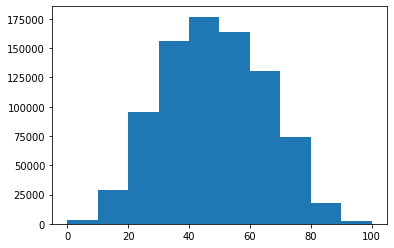

In [9]:
plt.hist(df_train['congestion'])

it can be observed that the distribution is almost normal

### Checking data types & converting

In [10]:
df_train.dtypes

row_id         int64
time          object
x              int64
y              int64
direction     object
congestion     int64
dtype: object

### Converting data types and encoding columns which are not numeric:

In [11]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['direction'])], axis=1)
df_train.head()

,row_id,time,x,y,direction,congestion,EB,NB,NE,NW,SB,SE,SW,WB
0,0,1991-04-01 00:00:00,0,0,EB,70,1,0,0,0,0,0,0,0
1,1,1991-04-01 00:00:00,0,0,NB,49,0,1,0,0,0,0,0,0
2,2,1991-04-01 00:00:00,0,0,SB,24,0,0,0,0,1,0,0,0
3,3,1991-04-01 00:00:00,0,1,EB,18,1,0,0,0,0,0,0,0
4,4,1991-04-01 00:00:00,0,1,NB,60,0,1,0,0,0,0,0,0


In [12]:
df_train = df_train.drop(columns='direction')

In [13]:
df_train

,row_id,time,x,y,congestion,EB,NB,NE,NW,SB,SE,SW,WB
0,0,1991-04-01 00:00:00,0,0,70,1,0,0,0,0,0,0,0
1,1,1991-04-01 00:00:00,0,0,49,0,1,0,0,0,0,0,0
2,2,1991-04-01 00:00:00,0,0,24,0,0,0,0,1,0,0,0
3,3,1991-04-01 00:00:00,0,1,18,1,0,0,0,0,0,0,0
4,4,1991-04-01 00:00:00,0,1,60,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,54,0,1,0,0,0,0,0,0
848831,848831,1991-09-30 11:40:00,2,3,28,0,0,1,0,0,0,0,0
848832,848832,1991-09-30 11:40:00,2,3,68,0,0,0,0,1,0,0,0
848833,848833,1991-09-30 11:40:00,2,3,17,0,0,0,0,0,0,1,0


In [14]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['direction'])], axis=1)
df_test = df_test.drop(columns='direction')
df_test.head()

,row_id,time,x,y,EB,NB,NE,NW,SB,SE,SW,WB
0,848835,1991-09-30 12:00:00,0,0,1,0,0,0,0,0,0,0
1,848836,1991-09-30 12:00:00,0,0,0,1,0,0,0,0,0,0
2,848837,1991-09-30 12:00:00,0,0,0,0,0,0,1,0,0,0
3,848838,1991-09-30 12:00:00,0,1,1,0,0,0,0,0,0,0
4,848839,1991-09-30 12:00:00,0,1,0,1,0,0,0,0,0,0


In [15]:
### TODO: split time in another columns

In [16]:
# convert str to datetime:
df_train['time'] = pd.to_datetime(df_train['time'])
df_test['time'] = pd.to_datetime(df_test['time'])

In [17]:
df_train['only_date'] = [d.date() for d in df_train['time']]
df_test['only_date'] = [d.date() for d in df_test['time']]

In [18]:
df_train['only_time'] = [d.time() for d in df_train['time']]
df_test['only_time'] = [d.time() for d in df_test['time']]

In [19]:
df_train

,row_id,time,x,y,congestion,EB,NB,NE,NW,SB,SE,SW,WB,only_date,only_time
0,0,1991-04-01 00:00:00,0,0,70,1,0,0,0,0,0,0,0,1991-04-01,00:00:00
1,1,1991-04-01 00:00:00,0,0,49,0,1,0,0,0,0,0,0,1991-04-01,00:00:00
2,2,1991-04-01 00:00:00,0,0,24,0,0,0,0,1,0,0,0,1991-04-01,00:00:00
3,3,1991-04-01 00:00:00,0,1,18,1,0,0,0,0,0,0,0,1991-04-01,00:00:00
4,4,1991-04-01 00:00:00,0,1,60,0,1,0,0,0,0,0,0,1991-04-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,54,0,1,0,0,0,0,0,0,1991-09-30,11:40:00
848831,848831,1991-09-30 11:40:00,2,3,28,0,0,1,0,0,0,0,0,1991-09-30,11:40:00
848832,848832,1991-09-30 11:40:00,2,3,68,0,0,0,0,1,0,0,0,1991-09-30,11:40:00
848833,848833,1991-09-30 11:40:00,2,3,17,0,0,0,0,0,0,1,0,1991-09-30,11:40:00


In [20]:
df_train['only_hour'] = [x.hour for x in df_train['only_time']]
df_test['only_hour'] = [x.hour for x in df_test['only_time']]

In [21]:
## converting datetime to a numeric timestamp:


In [22]:
df_train['timestamp'] = df_train.time.values.astype(np.int64) // 10 ** 9
df_train

,row_id,time,x,y,congestion,EB,NB,NE,NW,SB,SE,SW,WB,only_date,only_time,only_hour,timestamp
0,0,1991-04-01 00:00:00,0,0,70,1,0,0,0,0,0,0,0,1991-04-01,00:00:00,0,670464000
1,1,1991-04-01 00:00:00,0,0,49,0,1,0,0,0,0,0,0,1991-04-01,00:00:00,0,670464000
2,2,1991-04-01 00:00:00,0,0,24,0,0,0,0,1,0,0,0,1991-04-01,00:00:00,0,670464000
3,3,1991-04-01 00:00:00,0,1,18,1,0,0,0,0,0,0,0,1991-04-01,00:00:00,0,670464000
4,4,1991-04-01 00:00:00,0,1,60,0,1,0,0,0,0,0,0,1991-04-01,00:00:00,0,670464000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,54,0,1,0,0,0,0,0,0,1991-09-30,11:40:00,11,686230800
848831,848831,1991-09-30 11:40:00,2,3,28,0,0,1,0,0,0,0,0,1991-09-30,11:40:00,11,686230800
848832,848832,1991-09-30 11:40:00,2,3,68,0,0,0,0,1,0,0,0,1991-09-30,11:40:00,11,686230800
848833,848833,1991-09-30 11:40:00,2,3,17,0,0,0,0,0,0,1,0,1991-09-30,11:40:00,11,686230800


In [23]:
df_test['timestamp'] = df_test.time.values.astype(np.int64) // 10 ** 9
df_test

,row_id,time,x,y,EB,NB,NE,NW,SB,SE,SW,WB,only_date,only_time,only_hour,timestamp
0,848835,1991-09-30 12:00:00,0,0,1,0,0,0,0,0,0,0,1991-09-30,12:00:00,12,686232000
1,848836,1991-09-30 12:00:00,0,0,0,1,0,0,0,0,0,0,1991-09-30,12:00:00,12,686232000
2,848837,1991-09-30 12:00:00,0,0,0,0,0,0,1,0,0,0,1991-09-30,12:00:00,12,686232000
3,848838,1991-09-30 12:00:00,0,1,1,0,0,0,0,0,0,0,1991-09-30,12:00:00,12,686232000
4,848839,1991-09-30 12:00:00,0,1,0,1,0,0,0,0,0,0,1991-09-30,12:00:00,12,686232000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,851170,1991-09-30 23:40:00,2,3,0,1,0,0,0,0,0,0,1991-09-30,23:40:00,23,686274000
2336,851171,1991-09-30 23:40:00,2,3,0,0,1,0,0,0,0,0,1991-09-30,23:40:00,23,686274000
2337,851172,1991-09-30 23:40:00,2,3,0,0,0,0,1,0,0,0,1991-09-30,23:40:00,23,686274000
2338,851173,1991-09-30 23:40:00,2,3,0,0,0,0,0,0,1,0,1991-09-30,23:40:00,23,686274000


In [24]:
df_train['timestamp'].nunique()

13059

In [25]:
df_test['timestamp'].nunique()

36

### Checking column correlations

In [26]:
df_train.corr()

,row_id,x,y,congestion,EB,NB,NE,NW,SB,SE,SW,WB,only_hour,timestamp
row_id,1.000000,7.167761e-05,2.184311e-05,0.003324,-1.148939e-05,-9.547525e-06,6.278646e-06,1.308834e-05,-6.149253e-06,1.454260e-05,9.924312e-06,2.009349e-06,1.629942e-03,9.999970e-01
x,0.000072,1.000000e+00,-4.716851e-02,0.049721,-8.220349e-02,-8.220349e-02,6.382736e-02,1.915260e-01,-8.220349e-02,1.915260e-01,6.382736e-02,-2.677816e-02,1.512817e-17,1.018906e-18
y,0.000022,-4.716851e-02,1.000000e+00,-0.094124,-5.711885e-02,-5.711885e-02,1.177482e-01,-2.138806e-02,-5.711885e-02,-2.138806e-02,1.177482e-01,2.317793e-03,3.860121e-17,-8.866114e-20
congestion,0.003324,4.972085e-02,-9.412365e-02,1.000000,4.973370e-02,1.143908e-01,-1.622117e-01,-2.187634e-01,1.671426e-01,-1.374077e-01,-1.198540e-01,5.445736e-02,1.463255e-01,3.322576e-03
EB,-0.000011,-8.220349e-02,-5.711885e-02,0.049734,1.000000e+00,-2.264151e-01,-1.653057e-01,-8.478078e-02,-2.264151e-01,-8.478078e-02,-1.653057e-01,-2.147594e-01,-8.940525e-18,-3.220678e-19
NB,-0.000010,-8.220349e-02,-5.711885e-02,0.114391,-2.264151e-01,1.000000e+00,-1.653057e-01,-8.478078e-02,-2.264151e-01,-8.478078e-02,-1.653057e-01,-2.147594e-01,-1.236155e-17,2.977960e-19
NE,0.000006,6.382736e-02,1.177482e-01,-0.162212,-1.653057e-01,-1.653057e-01,1.000000e+00,-6.189845e-02,-1.653057e-01,-6.189845e-02,-1.206897e-01,-1.567958e-01,1.393841e-17,7.263590e-20
NW,0.000013,1.915260e-01,-2.138806e-02,-0.218763,-8.478078e-02,-8.478078e-02,-6.189845e-02,1.000000e+00,-8.478078e-02,-3.174603e-02,-6.189845e-02,-8.041632e-02,1.887935e-17,-1.409596e-19
SB,-0.000006,-8.220349e-02,-5.711885e-02,0.167143,-2.264151e-01,-2.264151e-01,-1.653057e-01,-8.478078e-02,1.000000e+00,-8.478078e-02,-1.653057e-01,-2.147594e-01,-7.197731e-18,-1.366065e-19
SE,0.000015,1.915260e-01,-2.138806e-02,-0.137408,-8.478078e-02,-8.478078e-02,-6.189845e-02,-3.174603e-02,-8.478078e-02,1.000000e+00,-6.189845e-02,-8.041632e-02,1.826799e-17,1.107227e-19


In [68]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
row_id,848835.0,4.244170e+05,2.450377e+05,0.0,212208.5,424417.0,636625.5,848834.0
x,848835.0,1.138462e+00,8.014784e-01,0.0,0.0,1.0,2.0,2.0
y,848835.0,1.630769e+00,1.089379e+00,0.0,1.0,2.0,3.0,3.0
congestion,848835.0,4.781530e+01,1.679939e+01,0.0,35.0,47.0,60.0,100.0
EB,848835.0,1.846154e-01,3.879855e-01,0.0,0.0,0.0,0.0,1.0
NB,848835.0,1.846154e-01,3.879855e-01,0.0,0.0,0.0,0.0,1.0
NE,848835.0,1.076923e-01,3.099916e-01,0.0,0.0,0.0,0.0,1.0
NW,848835.0,3.076923e-02,1.726920e-01,0.0,0.0,0.0,0.0,1.0
SB,848835.0,1.846154e-01,3.879855e-01,0.0,0.0,0.0,0.0,1.0
SE,848835.0,3.076923e-02,1.726920e-01,0.0,0.0,0.0,0.0,1.0


In [69]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
row_id,2340.0,8.500045e+05,675.644137,848835.0,8.494198e+05,850004.5,8.505892e+05,851174.0
x,2340.0,1.138462e+00,0.801649,0.0,0.000000e+00,1.0,2.000000e+00,2.0
y,2340.0,1.630769e+00,1.089611,0.0,1.000000e+00,2.0,3.000000e+00,3.0
EB,2340.0,1.846154e-01,0.388068,0.0,0.000000e+00,0.0,0.000000e+00,1.0
NB,2340.0,1.846154e-01,0.388068,0.0,0.000000e+00,0.0,0.000000e+00,1.0
NE,2340.0,1.076923e-01,0.310058,0.0,0.000000e+00,0.0,0.000000e+00,1.0
NW,2340.0,3.076923e-02,0.172729,0.0,0.000000e+00,0.0,0.000000e+00,1.0
SB,2340.0,1.846154e-01,0.388068,0.0,0.000000e+00,0.0,0.000000e+00,1.0
SE,2340.0,3.076923e-02,0.172729,0.0,0.000000e+00,0.0,0.000000e+00,1.0
SW,2340.0,1.076923e-01,0.310058,0.0,0.000000e+00,0.0,0.000000e+00,1.0


In [27]:
#TODO: more conversions, work with time columns later

In [28]:
import seaborn as sns


In [29]:
# sns.pairplot(df_train, hue='congestion')

In [30]:
# sns.pairplot(df_train[['x', 'y', 'congestion']], hue='congestion')

## Selecting columns

In [31]:
#selecting columns, excluding the time column at first:

In [97]:
y_train = df_train['congestion'].to_numpy()
# X_train = df_train.drop(columns=['row_id', 'only_date', 'only_time', 'time', 'congestion']).to_numpy()
# better for linreg:
df_train_selected =  df_train.drop(columns=['row_id', 'only_date', 'only_time', 'time', 'congestion', 'timestamp'])
X_train =df_train_selected.to_numpy()

In [70]:
# X_test = df_test.drop(columns=['row_id', 'only_date', 'only_time', 'time']).to_numpy()
X_test = df_test.drop(columns=['row_id', 'only_date', 'only_time', 'time', 'timestamp']).to_numpy()

In [71]:
df_test.drop(columns=['row_id', 'only_date', 'only_time', 'time', 'timestamp'])

,x,y,EB,NB,NE,NW,SB,SE,SW,WB,only_hour
0,0,0,1,0,0,0,0,0,0,0,12
1,0,0,0,1,0,0,0,0,0,0,12
2,0,0,0,0,0,0,1,0,0,0,12
3,0,1,1,0,0,0,0,0,0,0,12
4,0,1,0,1,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...
2335,2,3,0,1,0,0,0,0,0,0,23
2336,2,3,0,0,1,0,0,0,0,0,23
2337,2,3,0,0,0,0,1,0,0,0,23
2338,2,3,0,0,0,0,0,0,1,0,23


In [36]:
print("train shapes:", X_train.shape, y_train.shape)
print("test shapes:", X_test.shape)

train shapes: (848835, 11) (848835,)
test shapes: (2340, 11)


### Train validation splitting:

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [38]:
print("train shapes:", X_train.shape, y_train.shape)
print("validation shapes:", X_val.shape, y_val.shape)
print("test shapes:", X_test.shape)

train shapes: (763951, 11) (763951,)
validation shapes: (84884, 11) (84884,)
test shapes: (2340, 11)


## Model training

### Linear regression

In [42]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [43]:
y_pred_test = reg.predict(X_test)

In [44]:
y_pred_test

array([47.33806757, 49.61570963, 51.47373471, ..., 60.22494617,
       47.8963561 , 56.1326075 ])

In [284]:
print("MSE:")
reg.score(X_val, y_val) 

0.1881049056005567

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(y_val, y_pred_test))

### Lasso Regression

In [48]:
from sklearn import linear_model

#TODO: tune alpha param
clf = linear_model.Lasso(alpha=0.1)
clf = clf.fit(X_train, y_train)
y_pred_test_lasso = clf.predict(X_test)

In [49]:
y_pred_test_lasso

array([47.42281675, 49.69967035, 51.55771194, ..., 59.03409913,
       48.35470976, 54.94977272])

In [50]:
reg.score(X_val, y_val) 

0.19312788498019484

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(y_val, y_pred_test_lasso))

### Ridge Regression

In [55]:
from sklearn import linear_model

#TODO: tune alpha param
reg = linear_model.Ridge()
reg = reg.fit(X_train, y_train)
y_pred_test_ridge = reg.predict(X_test)


In [56]:
y_pred_test_ridge

array([47.33810196, 49.61572779, 51.47373969, ..., 60.22478323,
       47.89631093, 56.13247672])

In [57]:
reg.score(X_val, y_val) 

0.19312778314150358

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(y_val, y_pred_test_ridge))

### ElasticNet Regression

In [58]:
reg = linear_model.ElasticNet(alpha=.1)

reg = reg.fit(X_train, y_train)
y_pred_test_elasticnet = reg.predict(X_test)


In [59]:
y_pred_test_elasticnet

array([48.04039311, 49.83142253, 51.29322252, ..., 56.47904187,
       48.0922889 , 53.30871014])

In [60]:
reg.score(X_val, y_val) 

0.15126169200614725

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(y_val, y_pred_test_elasticnet))

### LARS

In [64]:
#TODO: adjust hyperparams, randomsearchCV~

In [61]:
reg = linear_model.LassoLars(alpha=.1, normalize=False)

reg = reg.fit(X_train, y_train)
y_pred_test_lars = reg.predict(X_test)


In [62]:
y_pred_test_lars

array([47.42273919, 49.69955977, 51.55760507, ..., 59.03418588,
       48.35479259, 54.94986065])

In [63]:
reg.score(X_val, y_val) 

0.1881049056005567

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(y_val, y_pred_test_lars))

### More advanced model - CNN

based on tutorial: https://www.tensorflow.org/tutorials/keras/regression

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [66]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


## Submission of results

### Linear regression - OLS

In [69]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_test

In [70]:
df_submission_example

,row_id,congestion
0,848835,38.804868
1,848836,41.087611
2,848837,42.950030
3,848838,38.074657
4,848839,40.357399
...,...,...
2335,851170,45.954933
2336,851171,33.429098
2337,851172,47.817353
2338,851173,35.477384


In [71]:
# df_submit1['congestion'].astype('float')

In [72]:
# df_submission_example['congestion'].map('{:,.2f}'.format)

In [73]:
df_submit1.to_csv('submission2.csv', index=False)

In [74]:
# # Normalize data:
# normalizer = tf.keras.layers.Normalization(axis=-1)

# normalizer.adapt(np.array(X_train))

In [79]:
# # keras sequential model:

# model = tf.keras.Sequential([
# #    normalizer,
#     layers.Dense(units=1)
# ])

# # model.compile()
# model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.1),
#     loss='mean_absolute_error')



# model.summary()

#### Another model:
based on tutorial from https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

In [99]:
df_train_selected.columns

Index(['x', 'y', 'EB', 'NB', 'NE', 'NW', 'SB', 'SE', 'SW', 'WB', 'only_hour'], dtype='object')

In [103]:
df_train_selected.dtypes

x            int64
y            int64
EB           uint8
NB           uint8
NE           uint8
NW           uint8
SB           uint8
SE           uint8
SW           uint8
WB           uint8
only_hour    int64
dtype: object

### CNNs & other DL with Keras, TF, Pytorch [Working, the best model so far]

In [286]:
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [255]:
X_train.shape

(848835, 11)

In [291]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Conv1D
#create model
model = Sequential()
#add model layers


input_shape = (11, 1)
model.add(Conv1D(64, kernel_size=1, activation='relu', input_shape=input_shape))
model.add(Conv1D(32, kernel_size=1, activation='relu'))
model.add(Flatten())


# model.add(Dense(10, activation=’softmax’))
model.add(Dense(1)) #changed bc we need 1 value

In [267]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 11, 64)            128       
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 11, 32)            2080      
_________________________________________________________________
flatten_12 (Flatten)         (None, 352)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 353       
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [268]:
input_shape = X_train[0].shape
input_shape
X_train.shape

(848835, 11)

In [139]:
X_train[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [292]:
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
NR_EPOCHS = 10
# history = modelel.fit(X_train, y_train, epochs=NR_EPOCHS, validation_data=(X_val, y_val))

history = model.fit(X_train_reshaped, y_train, epochs=NR_EPOCHS, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
15326/26527 [================>.............] - ETA: 28s - loss: 12.5284 - mean_squared_error: 249.7315 - mean_absolute_error: 12.5284

In [ ]:
y_pred_CNN1 = model.predict(X_test_reshaped)

In [ ]:
y_pred_CNN1

### Model with PyTorch - Experimenting, not working yet

In [221]:
# import torch

#works, but slow:
# model = torch.nn.Sequential(
#     torch.nn.BatchNorm1d(11, 1),
#     torch.nn.Linear(11, 1),
#     torch.nn.Flatten(0, 1)
# )

In [227]:
XX_train = torch.tensor(X_train).float()
XX_train.shape

torch.Size([848835, 11])

In [246]:
import torch

# expects 2D input:
model = torch.nn.Sequential(
    torch.nn.Conv1d(11, 22, kernel_size=1),
#     torch.nn.Conv1d(22, 44, kernel_size=1),
#     torch.nn.Conv1d(44, 11, kernel_size=1),
    torch.nn.Flatten(0, 2),
    

    torch.nn.Linear(11, 1),
    torch.nn.Flatten(0, 1)
)

In [247]:
XX_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
print(XX_train.shape)
XX_train = torch.tensor(XX_train).float()
XX_train.shape

(848835, 11, 1)


torch.Size([848835, 11, 1])

In [244]:
yy_train = torch.tensor(y_train).float()

In [231]:
# import math
# # Create Tensors to hold input and outputs.
# x = torch.linspace(-math.pi, math.pi, 2000)
# y = torch.sin(x)

# # For this example, the output y is a linear function of (x, x^2, x^3), so
# # we can consider it as a linear layer neural network. Let's prepare the
# # tensor (x, x^2, x^3).
# p = torch.tensor([1, 2, 3])
# xx = x.unsqueeze(-1).pow(p)

xx.shape

torch.Size([2000, 3])

In [206]:
loss_fn(torch.tensor([1,2]).float(), torch.tensor([3, 4]).float())

tensor(4.)

In [248]:
# loss_fn = torch.nn.MSELoss(reduction='sum')
loss_fn = torch.nn.MSELoss()

learning_rate = 1e-6


for t in range(2000):
# for t in range(200):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    yy_pred = model(XX_train)
#     print("yy_pred:", yy_pred)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(yy_pred, yy_train)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad


RuntimeError: size mismatch, m1: [1 x 18674370], m2: [11 x 1] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:41

In [218]:
yy_pred

tensor([-0.4796, -0.1429, -0.4488,  ..., -0.3394, -0.1310, -0.0231],
       grad_fn=<ViewBackward>)

In [213]:
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

ValueError: only one element tensors can be converted to Python scalars

### Lasso

In [108]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_test_lasso
df_submit1.to_csv('submission2_lasso.csv', index=False)

### Ridge

In [110]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_test_ridge
df_submit1.to_csv('submission2_ridge.csv', index=False)

### ElasticNet

In [111]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_test_elasticnet
df_submit1.to_csv('submission2_elasticnet.csv', index=False)

### LARS

In [112]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_test_lars
df_submit1.to_csv('submission2_lars.csv', index=False)

### CNN1 with tensorflow

In [ ]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_CNN1
df_submit1.to_csv('submission3_CNN2_MAE.csv', index=False)